In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

## Alameda County Jury Panels ##

### Is Racial Disparity in Jury Panels still a problem?
A 2010 report by the ACLU for Alameda County explores a possible issue in their process. 


In [2]:
# Create a table that shows the percent of eligible residents representing different ethnicities.
# Display a column with the distribution the jury panels have had. 
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


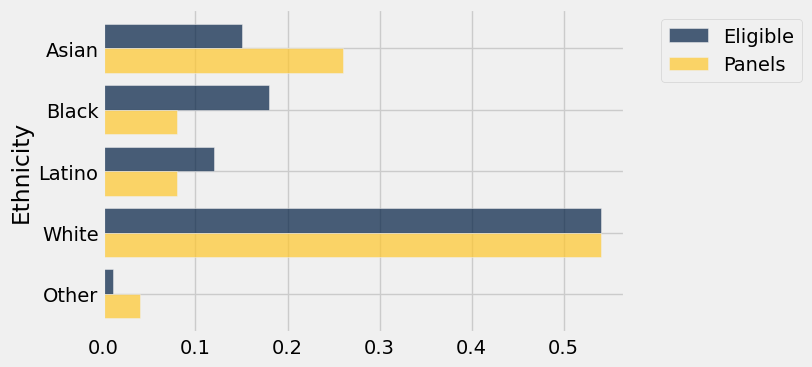

In [3]:
# Visually show the table data. 
jury.barh('Ethnicity')

In [4]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [5]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.15390021,  0.17919888,  0.1173577 ,  0.53970485,  0.00983837])

In [6]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.1539
Black,0.18,0.08,0.179199
Latino,0.12,0.08,0.117358
White,0.54,0.54,0.539705
Other,0.01,0.04,0.00983837


In [7]:
# Create a horizontal bar graph that compares all three values. 


## Distance Between Distributions

In [8]:
# In Mendel's model, the difference between observed white/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance
 A new statistic (to us).

In [10]:
# Calculate the TVD using two distributions. For each category take the absolute value of the difference.
# Then divide by 2.
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [14]:
# The TVD of our observed data (Panels) from Alameda's expected values
# assuming our model is true (Eligible)

obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [15]:
# The TVD of a model simluation from its expected values

tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.0085312719606464912

In [16]:
# Create a function that will simulate juror panels of 1423, ten thousand times. 

def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [ ]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

#Create a histogram that will display the simulated TVDs using the given bins. 



#Leave this code, which will display the TVD of the actual juries.
print('Observed TVD: ' + str(obsvd_tvd))

### Based on the data, would you say Alameda's Jury Selection is biased or unbiased?

Type your answer here. 